In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [4]:
print('loading')
train_dir = "C:\\Users\\hp\\Downloads\\11 Flowers\\train"
test_dir = "C:\\Users\\hp\\Downloads\\11 Flowers\\test"
print('succesfully')

loading
succesfully


In [5]:
img_height, img_width = 224, 224
batch_size = 32

# Data generators for loading and augmenting data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [6]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3250 images belonging to 5 classes.


In [7]:
# Load test data
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 530 images belonging to 5 classes.


In [8]:
# Define a simple CNN model for flower classification
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 classes for flowers
])

In [9]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
# Train the model
epochs = 10
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=epochs
)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3168 - loss: 1.6644

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


102/102 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.3176 - loss: 1.6617 - val_accuracy: 0.4792 - val_loss: 1.1964
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.5595 - loss: 1.0865 - val_accuracy: 0.6094 - val_loss: 1.0244
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.6125 - loss: 0.9873 - val_accuracy: 0.6396 - val_loss: 0.9156
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.6492 - loss: 0.9153 - val_accuracy: 0.6830 - val_loss: 0.8674
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 659s 7s/step - accuracy: 0.6611 - loss: 0.8504 - val_accuracy: 0.7151 - val_loss: 0.7700
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.6853 - loss: 0.8230 - val_accuracy: 0.6943 - val_loss: 0.7721
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.7146 - loss: 0.7679 - val_accuracy: 0.7283 - val_loss: 0.7433
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.7068 - loss: 0.7803 - val_accuracy: 0.701

In [11]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 495ms/step - accuracy: 0.7213 - loss: 0.6608
Test accuracy: 71.51%


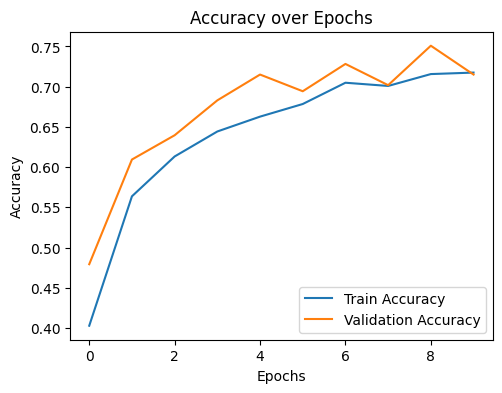

In [12]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [13]:
# Display some predictions on test images
test_images, test_labels = next(iter(test_data))
predicted_flower = model.predict(test_images)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [14]:
flower_classes = list(train_data.class_indices.keys())

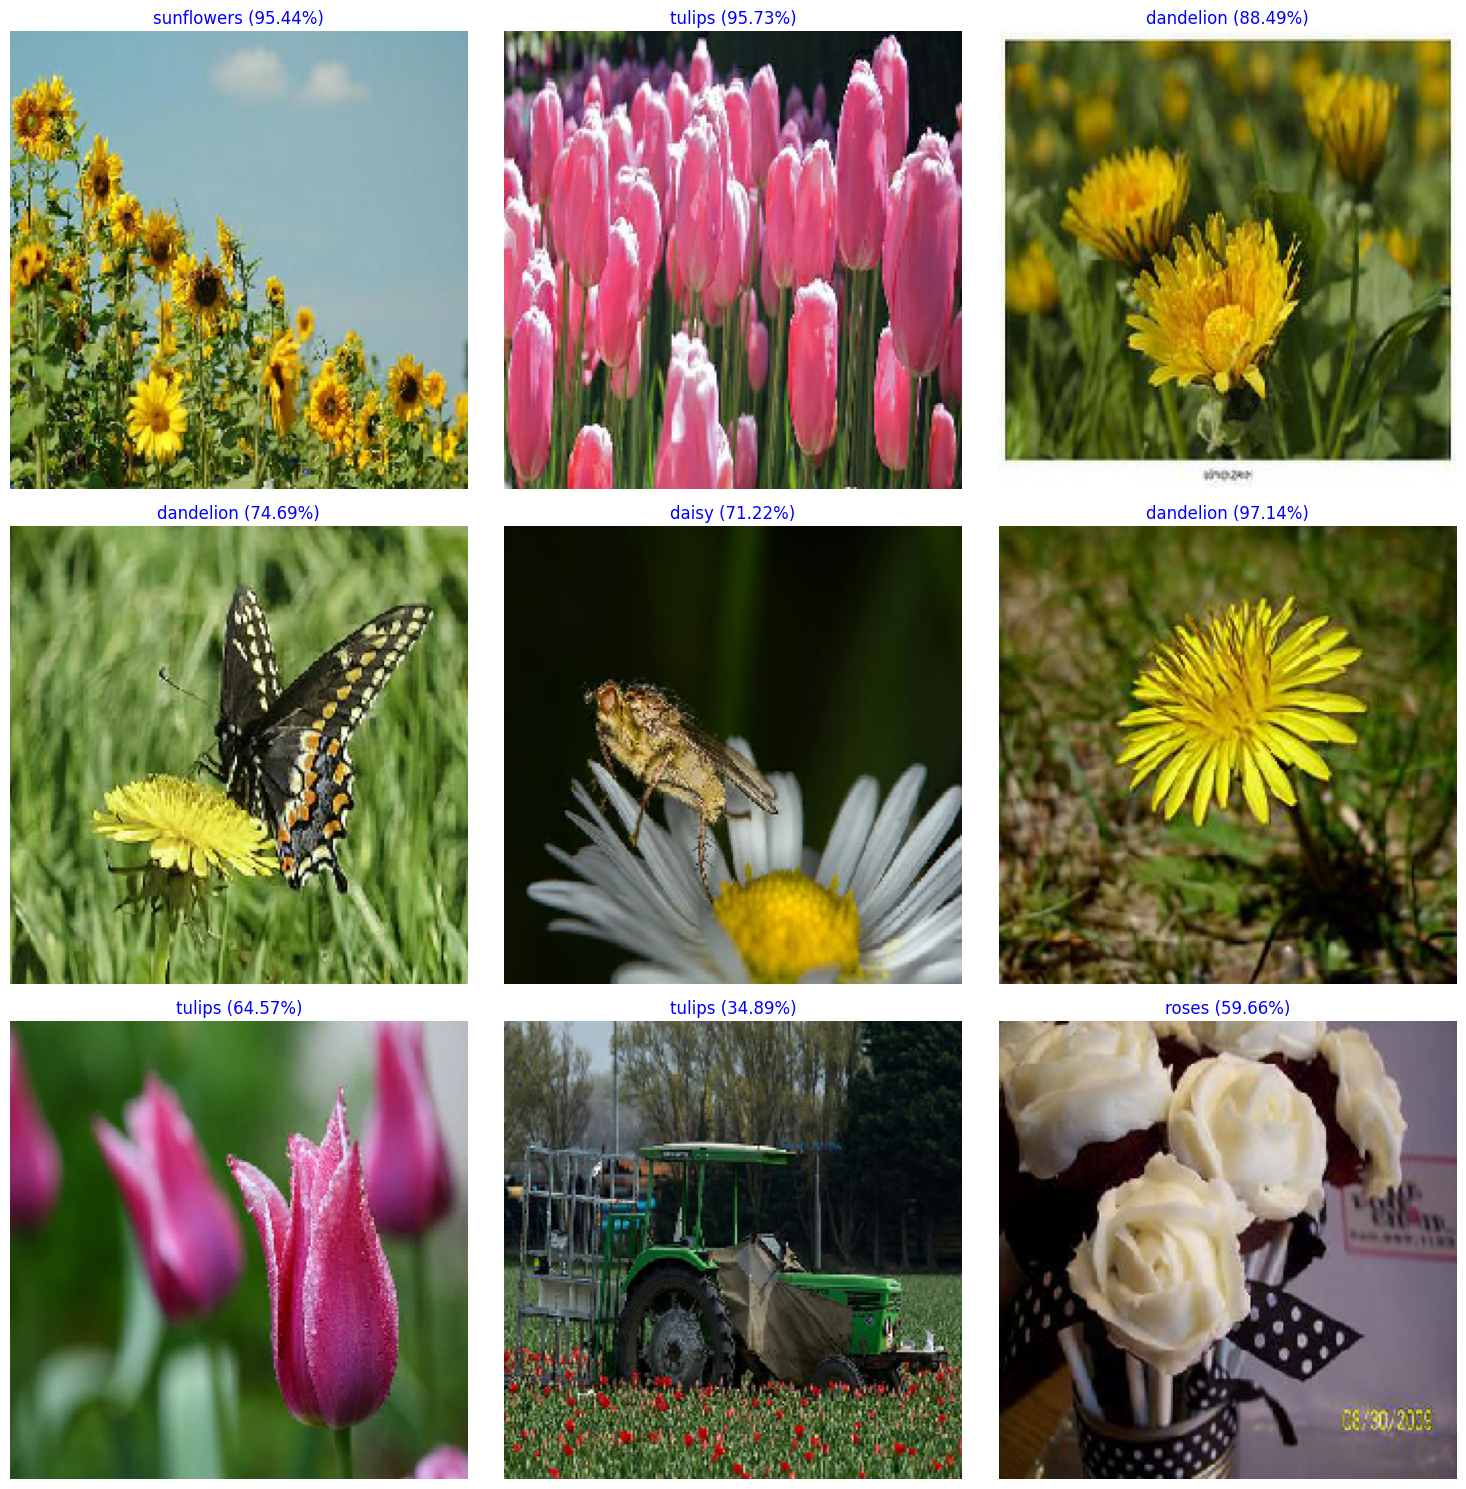

In [15]:
# Plot the images along with predicted classes
plt.figure(figsize=(15, 15))
for i in range(9):  # Display the first 9 images and their predictions
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    
    # Predicted flower class and probability
    flower_class_idx = np.argmax(predicted_flower[i])
    flower_name = flower_classes[flower_class_idx]
    confidence = predicted_flower[i][flower_class_idx] * 100
    
    # Display label
    plt.title(f"{flower_name} ({confidence:.2f}%)", color='blue')
    plt.axis('off')

plt.tight_layout()
plt.show()
